<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/2_1_Dados_Ausentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlrd==1.2.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Dados Ausentes

Na linha abaixo será feito o download do dataset

In [3]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
df = pd.read_excel(url)

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


#Dimensões da base

In [ ]:
df.shape

(1309, 14)

In [ ]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


Python trata True como 1 e False como 0

In [ ]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

##Usando a biblioteca missingo

Biblioteca que ajuda na visualização de dados ausentes

In [ ]:
import missingno as msno

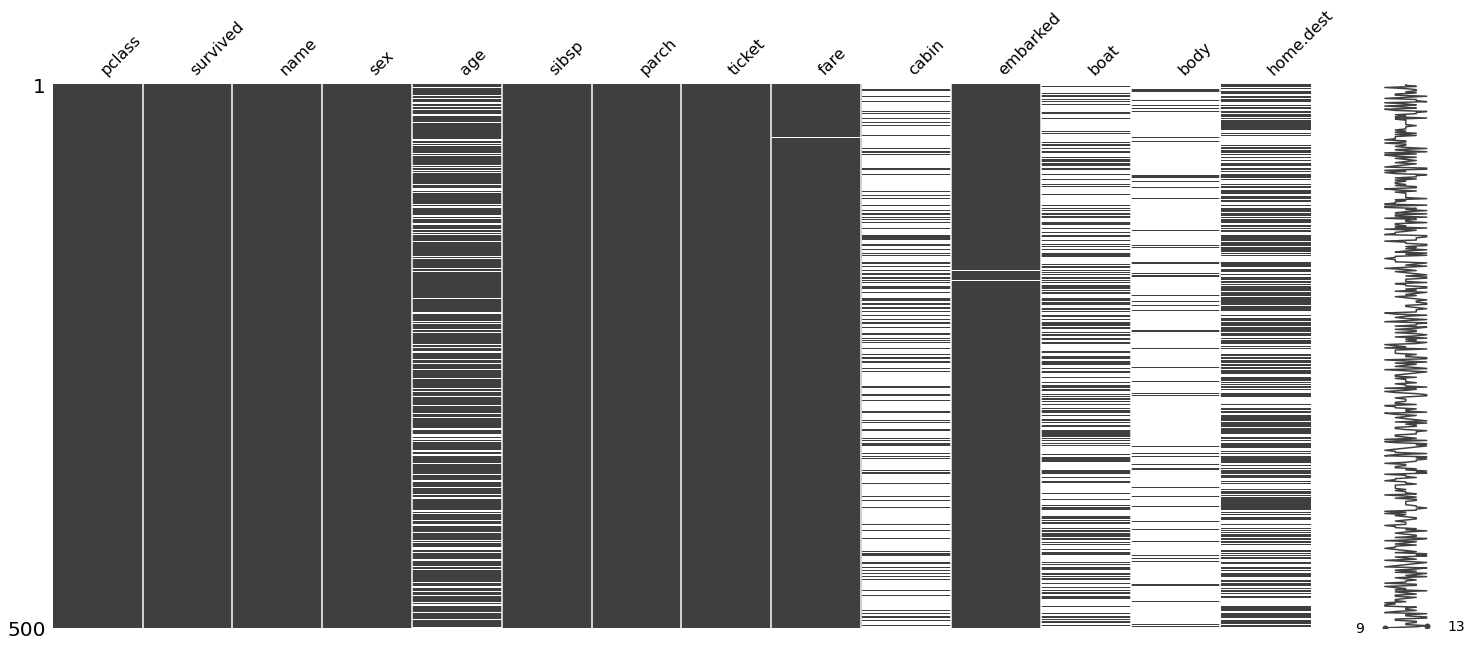

In [ ]:
ax = msno.matrix(df.sample(500))

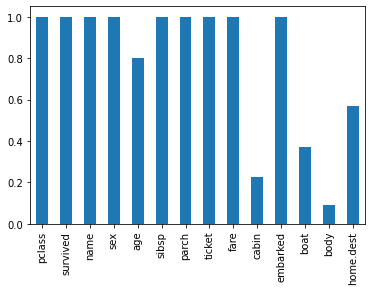

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4))
#(df.isnull().mean()).abs().plot.bar(ax=ax) # ausentes
(1 - df.isnull().mean()).abs().plot.bar(ax=ax) # não ausentes

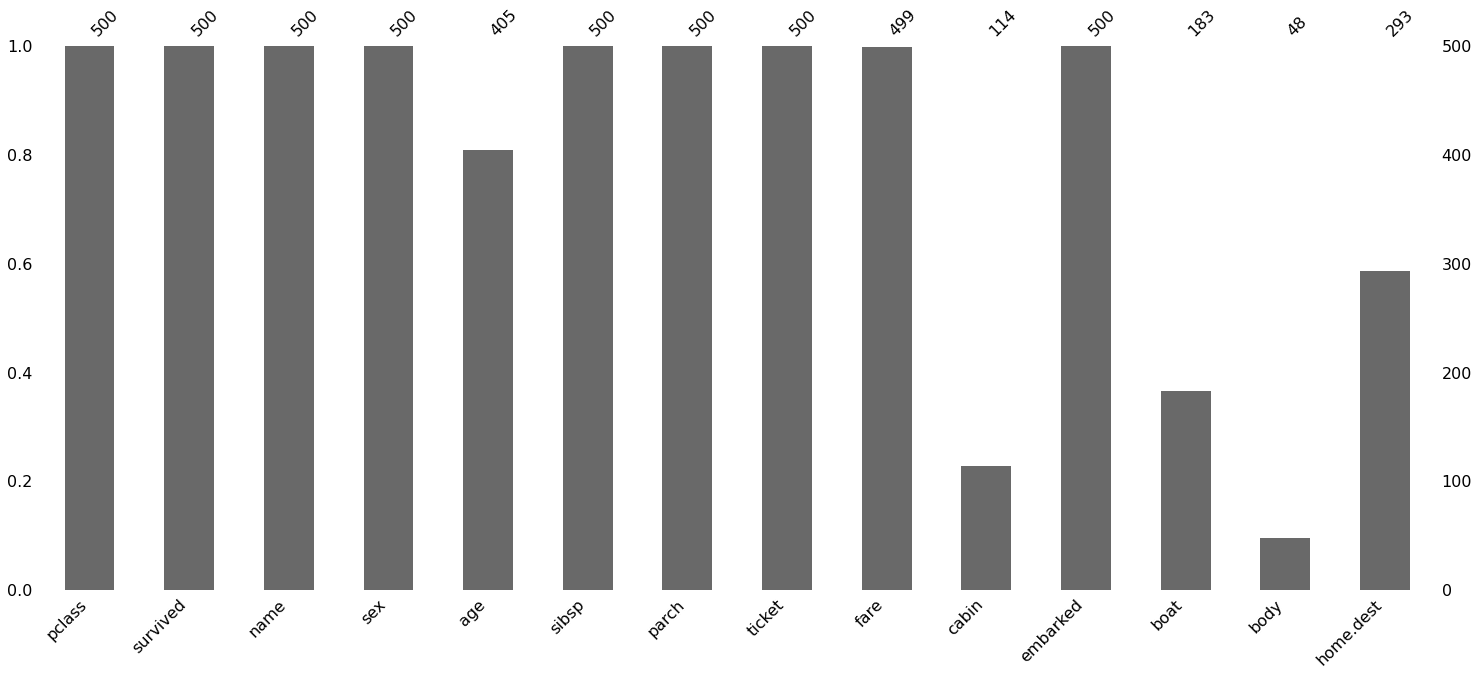

In [ ]:
msno.bar(df.sample(500))

## Descartando Dados Ausentes

In [ ]:
df1 = df.dropna() #descarta todas as linhas contenndo dados ausentes

Descartar nem sempre é uma boa opção. Use-a como última.

In [ ]:
df1.shape

(0, 14)

## Imputando dados

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_cols = df.select_dtypes(include="number").columns
num_cols

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

SimpleInputer()

SimpleInputer(strategy='median')

SimpleInputer(strategy='most_frequent')

SimpleInputer(strategy='constant', fill_value = -1) # preencher com -1

In [ ]:
im = SimpleImputer() # média

In [ ]:
imputed = im.fit_transform(df[num_cols])

In [ ]:
imputed

array([[  1.        ,   1.        ,  29.        , ...,   0.        ,
        211.3375    , 160.80991736],
       [  1.        ,   1.        ,   0.9167    , ...,   2.        ,
        151.55      , 160.80991736],
       [  1.        ,   0.        ,   2.        , ...,   2.        ,
        151.55      , 160.80991736],
       ...,
       [  3.        ,   0.        ,  26.5       , ...,   0.        ,
          7.225     , 304.        ],
       [  3.        ,   0.        ,  27.        , ...,   0.        ,
          7.225     , 160.80991736],
       [  3.        ,   0.        ,  29.        , ...,   0.        ,
          7.875     , 160.80991736]])

#Exemplo2 usando SimpleImputer

In [ ]:
df1 = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")

df2 = pd.DataFrame([["a", "x"],
                    ["", "y"],
                    ["a", ""],
                    ["b", "y"]], dtype="category")

In [ ]:
df1

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [ ]:
#imp = SimpleImputer(strategy="most_frequent")
imp = SimpleImputer(missing_values="", strategy='most_frequent')

In [ ]:
print(imp.fit_transform(df2))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]
